# fit poisson

In [117]:

import numpy as np
import math
from scipy.optimize import minimize 

def my_poisson(k,l):
    return (np.float(l)**k)*np.exp(-l)/math.factorial(k)


def my_poisson_cdf(n,l):
    a = range(0,n+1)
    return sum([my_poisson(i,l) for i in a])


def eq(l):
    p = (365.-22.)/365.
    tmp = my_poisson_cdf(8,l)
    return (tmp-p)**2
 
x0 = 1    
result = minimize(eq,
            x0,
            tol=1E-10,
            options={
                'maxiter': 100,
            })


print(result)
print("real prop: %f" % ((365.-22.)/365.,))
print("my_prop: %f" % my_poisson_cdf(8,result.x[0]) )

      fun: 4.125397694461333e-20
 hess_inv: array([[136.93681072]])
      jac: array([2.9867867e-11])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 3
     njev: 20
   status: 0
  success: True
        x: array([4.87558103])
real prop: 0.939726
my_prop: 0.939726


In [118]:
from scipy.stats import poisson
from scipy.optimize import minimize 

def eq(l):
    p = (365.-22.)/365.
    tmp = poisson.cdf(8,l)
    return (tmp-p)**2
 
x0 = 1    
result = minimize(eq,
            x0,
            tol=1E-10,
            options={
                'maxiter': 100,
            })

print(result)
print("real prop: %f" % ((365.-22.)/365.,))
print("my_prop: %f" % my_poisson_cdf(8,result.x[0]) )

      fun: 2.0260166498029975e-19
 hess_inv: array([[136.92676373]])
      jac: array([1.51960643e-14])
  message: 'Optimization terminated successfully.'
     nfev: 63
      nit: 4
     njev: 21
   status: 0
  success: True
        x: array([4.87558103])
real prop: 0.939726
my_prop: 0.939726


In [114]:
result.x[0]

4.875581034144443

## with possion cdf

In [76]:
a = range(0,9)
l = 4.87558103
sum([poisson(i,l) for i in a])


0.9397260278508198

In [77]:
p = (365-22)/365.
print(p)

0.9397260273972603


In [94]:
from scipy.stats import poisson

n_crit = 22
n_year = 365
n_9plus = 22/365
lamb_guess = 10
n_zero8 = 1-n_9plus
print(n_zero8)
print(poisson.cdf(8,lamb_guess))
while poisson.cdf(8,lamb_guess) < n_zero8:
    lamb_guess -= 0.0005

print(poisson.cdf(8,lamb_guess))
print(lamb_guess)

0.9397260273972603
0.3328196787507191
0.9397309243663355
4.875499999999288


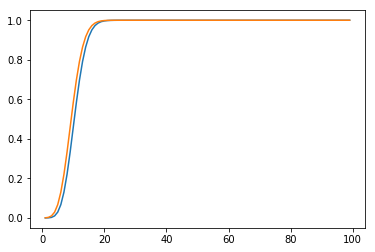

In [89]:
import matplotlib.pyplot as plt

x = range(1,100)
lamb=10
y_my = [my_poisson_cdf(i,lamb) for i in x]
y_py = [poisson.cdf(i,lamb) for i in x]

plt.plot(x,y_my)
plt.plot(x,y_py)
plt.show()